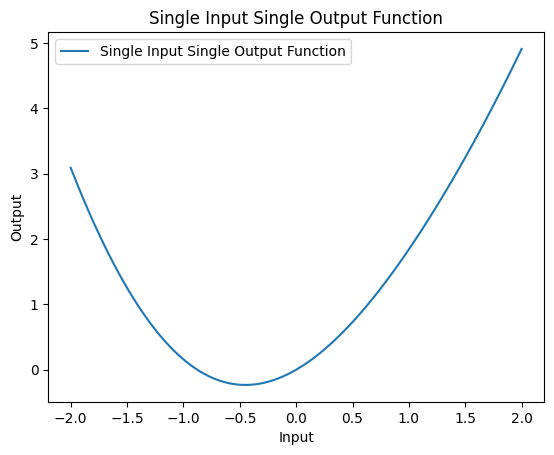

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as pt
import torch.nn.functional as f

def simulationFunction(x):
    return np.sin(x) + x**2

x_train = np.linspace(-2,2,4000).reshape(4000, 1)
y_train = simulationFunction(x_train)

x_actual = np.linspace(-2,2,2000).reshape(2000,1)
y_actual = simulationFunction(x_actual)

#converting arrays to tensors
x_train, y_train = torch.FloatTensor(x_train), torch.FloatTensor(y_train)
x_actual, y_actual = torch.FloatTensor(x_actual), torch.FloatTensor(y_actual)

pt.plot(x_actual, y_actual, label="Single Input Single Output Function")
pt.title("Single Input Single Output Function")
pt.xlabel("Input")
pt.ylabel("Output")
pt.legend()
pt.show()

In [15]:
#Constructing DNN models and defining loss function and optimizer
class DNN_1(torch.nn.Module):
    def __init__(self):
        super(DNN_1, self).__init__()
        self.input = torch.nn.Linear(1, 10)
        self.hidden1 = torch.nn.Linear(10, 20)
        self.hidden2 = torch.nn.Linear(20, 20)
        self.hidden3 = torch.nn.Linear(20, 20)
        self.hidden4 = torch.nn.Linear(20, 20)
        self.hidden5 = torch.nn.Linear(20, 20)
        self.hidden6 = torch.nn.Linear(20, 20)
        self.output = torch.nn.Linear(20, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.relu(self.hidden4(x))
        x = self.relu(self.hidden5(x))
        x = self.relu(self.hidden6(x))
        x = self.output(x)
        return x
    
model_1 = DNN_1()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.001)
print(f'Number of parameters in DNN Model1: {sum(param.numel() for param in model_1.parameters())}')


class DNN_2(torch.nn.Module):
    def __init__(self):
        super(DNN_2, self).__init__()
        self.input = torch.nn.Linear(1, 10)
        self.hidden1 = torch.nn.Linear(10, 20)
        self.hidden2 = torch.nn.Linear(20, 30)
        self.hidden3 = torch.nn.Linear(30, 20)
        self.output = torch.nn.Linear(20, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        return x
    
model_2 = DNN_2()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=0.001)
print(f'Number of parameters in DNN Model2: {sum(param.numel() for param in model_2.parameters())}')

class DNN_3(torch.nn.Module):
    def __init__(self):
        super(DNN_3, self).__init__()
        self.input = torch.nn.Linear(1, 20)
        self.hidden1 = torch.nn.Linear(20, 30)
        self.output = torch.nn.Linear(30, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden1(x))
        x = self.output(x)
        return x
    
model_3 = DNN_3()
optimizer_3 = torch.optim.Adam(model_3.parameters(), lr=0.001)
print(f'Number of parameters in DNN Model3: {sum(param.numel() for param in model_3.parameters())}')

mesaure_loss = torch.nn.MSELoss()

Number of parameters in DNN Model1: 2361
Number of parameters in DNN Model2: 1511
Number of parameters in DNN Model3: 701


In [16]:
def train_model(DnnModel, optimizer, x_train, y_train, mesaure_loss):
    DnnModel.train()
    loss_arr = []
    epoch = 0
    max_epochs = 20000
    
    while epoch < max_epochs:
        optimizer.zero_grad()
        outputs = DnnModel(x_train)
        criterion = mesaure_loss(outputs, y_train)
        criterion.backward()
        optimizer.step()
        
        loss_arr.append(criterion.detach().numpy())
        
        if epoch%100 == 0:
            print(f'Epoch: {epoch}, Loss: {criterion.item():.3f}')
            
        if epoch > 0 and abs(loss_arr[-2] - loss_arr[-1]) < 1e-5:
            print(f'Convergence reached at epoch: {epoch} with loss: {criterion.item()}')
            break
            
        epoch += 1
    return loss_arr

model_1_loss = train_model(model_1, optimizer_1, x_train, y_train, mesaure_loss)
model_2_loss = train_model(model_2, optimizer_2, x_train, y_train, mesaure_loss)
model_3_loss = train_model(model_3, optimizer_3, x_train, y_train, mesaure_loss)

Epoch: 0, Loss: 3.737
Epoch: 100, Loss: 1.499
Epoch: 200, Loss: 0.070
Epoch: 300, Loss: 0.012
Epoch: 400, Loss: 0.002
Convergence reached at epoch: 414 with loss: 0.0012362939305603504
Epoch: 0, Loss: 3.849
Epoch: 100, Loss: 0.654
Epoch: 200, Loss: 0.023
Epoch: 300, Loss: 0.010
Epoch: 400, Loss: 0.004
Epoch: 500, Loss: 0.002
Convergence reached at epoch: 532 with loss: 0.0017591867363080382
Epoch: 0, Loss: 4.524
Epoch: 100, Loss: 0.794
Epoch: 200, Loss: 0.153
Epoch: 300, Loss: 0.035
Epoch: 400, Loss: 0.017
Epoch: 500, Loss: 0.010
Epoch: 600, Loss: 0.007
Epoch: 700, Loss: 0.005
Convergence reached at epoch: 769 with loss: 0.004319232888519764


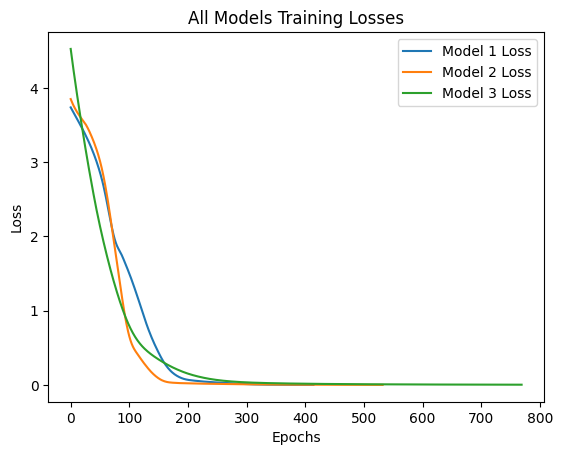

In [17]:
#plotting the model loss
pt.plot(model_1_loss, label = 'Model 1 Loss')
pt.plot(model_2_loss, label = 'Model 2 Loss')
pt.plot(model_3_loss, label = 'Model 3 Loss')

pt.title('All Models Training Losses')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.legend()
pt.show()

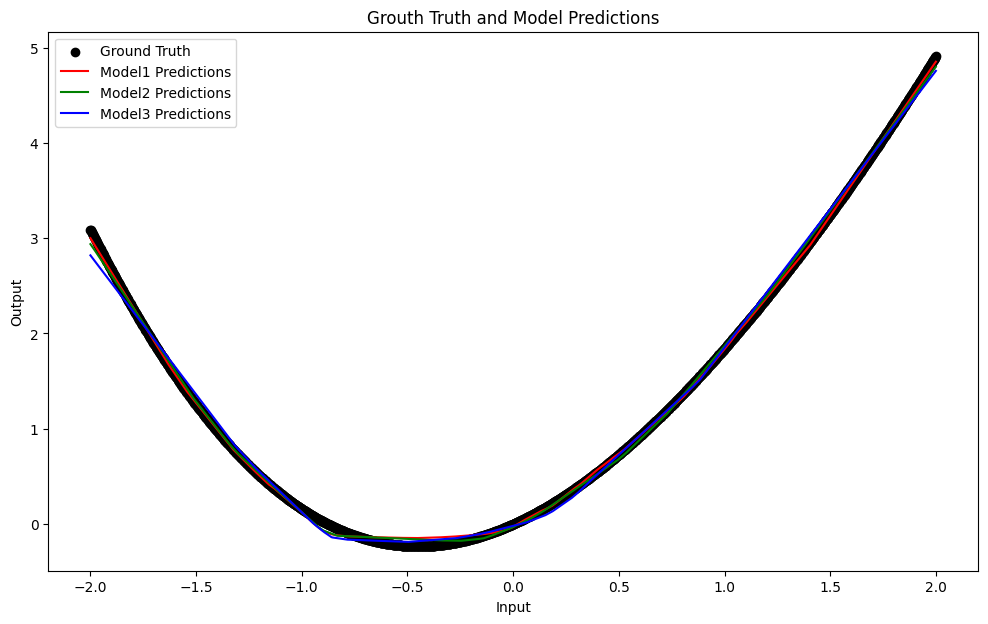

In [18]:
#Ground Truth and Predictions
pt.figure(figsize=(12,7))
pt.scatter(x_actual, y_actual, color='black', label = 'Ground Truth')

labels = ['Model1 Predictions', 'Model2 Predictions', 'Model3 Predictions']
colors = ['red','green','blue']
for model, label, c in zip([model_1, model_2, model_3], labels, colors):
    model.eval()
    with torch.no_grad():
        pt.plot(x_actual, model(x_actual).numpy(), label=label, color=c)
pt.title('Grouth Truth and Model Predictions')
pt.xlabel('Input')
pt.ylabel('Output')
pt.legend()
pt.show()

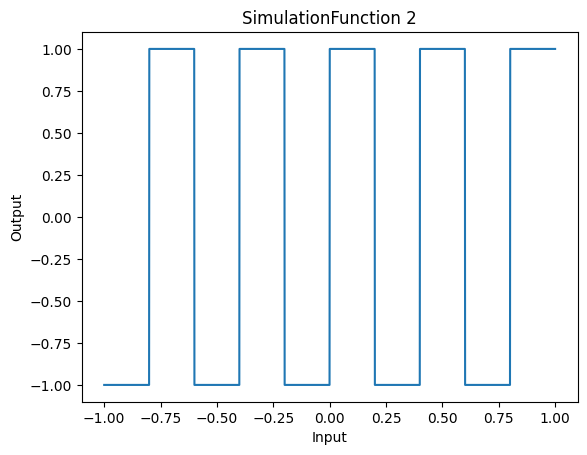

In [34]:
def simulationFunction(x):
    return np.sign(np.sin(5*np.pi*x))

x_train = np.linspace(-1,1,6000).reshape(6000, 1)
y_train = simulationFunction(x_train)

x_actual = np.linspace(-1,1,2000).reshape(2000,1)
y_actual = simulationFunction(x_actual)

#converting arrays to tensors
x_train, y_train = torch.FloatTensor(x_train), torch.FloatTensor(y_train)
x_actual, y_actual = torch.FloatTensor(x_actual), torch.FloatTensor(y_actual)

pt.plot(x_actual, y_actual)
pt.title("SimulationFunction 2")
pt.xlabel("Input")
pt.ylabel("Output")
pt.show()

In [24]:
#Constructing DNN models and defining loss function and optimizer
class NonLinear_DNN_1(torch.nn.Module):
    def __init__(self):
        super(NonLinear_DNN_1, self).__init__()
        self.input = torch.nn.Linear(1, 5)
        self.hidden1 = torch.nn.Linear(5, 10)
        self.hidden2 = torch.nn.Linear(10, 10)
        self.hidden3 = torch.nn.Linear(10, 10)
        self.hidden4 = torch.nn.Linear(10, 10)
        self.hidden5 = torch.nn.Linear(10, 10)
        self.hidden6 = torch.nn.Linear(10, 5)
        self.output = torch.nn.Linear(5, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.relu(self.hidden4(x))
        x = self.relu(self.hidden5(x))
        x = self.relu(self.hidden6(x))
        x = self.output(x)
        return x
    
nonLinear_model_1 = NonLinear_DNN_1()
nonLinear_optimizer_1 = torch.optim.Adam(nonLinear_model_1.parameters(), lr=0.001)
mesaure_loss = torch.nn.MSELoss()
print(f'Number of parameters in DNN Model1: {sum(param.numel() for param in nonLinear_model_1.parameters())}')


class NonLinear_DNN_2(torch.nn.Module):
    def __init__(self):
        super(NonLinear_DNN_2, self).__init__()
        self.input = torch.nn.Linear(1, 10)
        self.hidden1 = torch.nn.Linear(10, 18)
        self.hidden2 = torch.nn.Linear(18, 15)
        self.hidden3 = torch.nn.Linear(15, 4)
        self.output = torch.nn.Linear(4, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.output(x)
        return x
    
nonLinear_model_2 = NonLinear_DNN_2()
nonLinear_optimizer_2 = torch.optim.Adam(nonLinear_model_2.parameters(), lr=0.001)
mesaure_loss = torch.nn.MSELoss()
print(f'Number of parameters in DNN Model2: {sum(param.numel() for param in nonLinear_model_2.parameters())}')

class NonLinear_DNN_3(torch.nn.Module):
    def __init__(self):
        super(NonLinear_DNN_3, self).__init__()
        self.input = torch.nn.Linear(1, 190)
        self.output = torch.nn.Linear(190, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.output(x)
        return x
    
nonLinear_model_3 = NonLinear_DNN_3()
nonLinear_optimizer_3 = torch.optim.Adam(nonLinear_model_3.parameters(), lr=0.001)
print(f'Number of parameters in DNN Model3: {sum(param.numel() for param in nonLinear_model_3.parameters())}')

mesaure_loss = torch.nn.MSELoss()
nonLinear_model_1_loss = train_model(nonLinear_model_1, nonLinear_optimizer_1, x_train, y_train, mesaure_loss)
nonLinear_model_2_loss = train_model(nonLinear_model_2, nonLinear_optimizer_2, x_train, y_train, mesaure_loss)
nonLinear_model_3_loss = train_model(nonLinear_model_3, nonLinear_optimizer_3, x_train, y_train, mesaure_loss)

Number of parameters in DNN Model1: 571
Number of parameters in DNN Model2: 572
Number of parameters in DNN Model3: 571
Epoch: 0, Loss: 1.065
Epoch: 100, Loss: 0.989
Epoch: 200, Loss: 0.965
Epoch: 300, Loss: 0.945
Epoch: 400, Loss: 0.886
Epoch: 500, Loss: 0.814
Epoch: 600, Loss: 0.756
Epoch: 700, Loss: 0.562
Epoch: 800, Loss: 0.394
Epoch: 900, Loss: 0.176
Convergence reached at epoch: 959 with loss: 0.14483554661273956
Epoch: 0, Loss: 1.033
Epoch: 100, Loss: 0.968
Epoch: 200, Loss: 0.941
Epoch: 300, Loss: 0.834
Epoch: 400, Loss: 0.727
Epoch: 500, Loss: 0.586
Convergence reached at epoch: 594 with loss: 0.4290381968021393
Epoch: 0, Loss: 1.032
Epoch: 100, Loss: 0.925
Epoch: 200, Loss: 0.889
Epoch: 300, Loss: 0.860
Epoch: 400, Loss: 0.829
Epoch: 500, Loss: 0.794
Epoch: 600, Loss: 0.756
Epoch: 700, Loss: 0.714
Epoch: 800, Loss: 0.669
Epoch: 900, Loss: 0.620
Epoch: 1000, Loss: 0.567
Epoch: 1100, Loss: 0.514
Epoch: 1200, Loss: 0.465
Epoch: 1300, Loss: 0.421
Epoch: 1400, Loss: 0.385
Epoch: 1

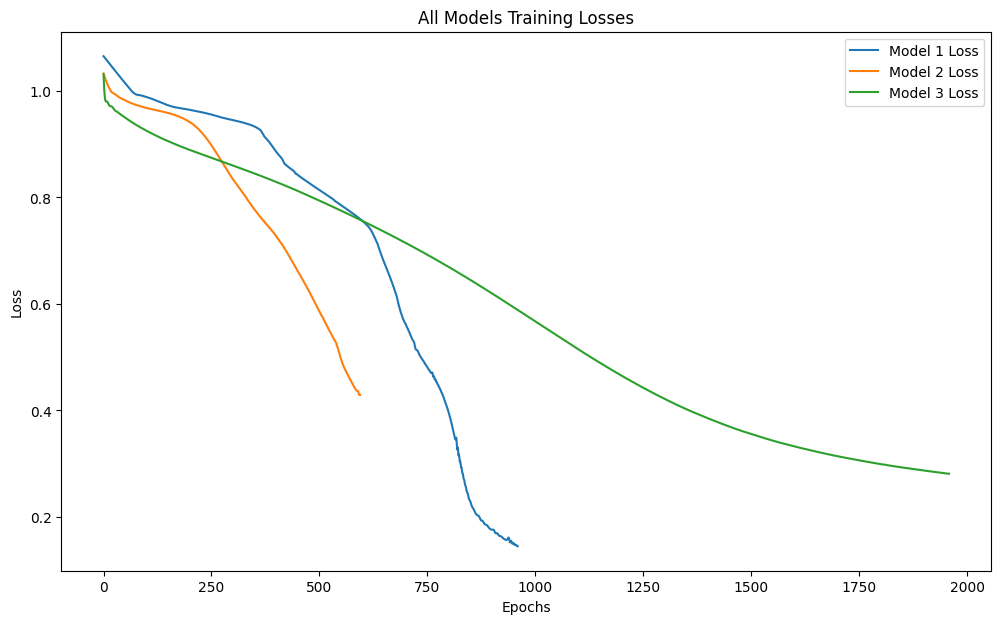

In [25]:
#plotting the model loss
pt.figure(figsize=(12,7))
pt.plot(nonLinear_model_1_loss, label = 'Model 1 Loss')
pt.plot(nonLinear_model_2_loss, label = 'Model 2 Loss')
pt.plot(nonLinear_model_3_loss, label = 'Model 3 Loss')

pt.title('All Models Training Losses')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.legend()
pt.show()

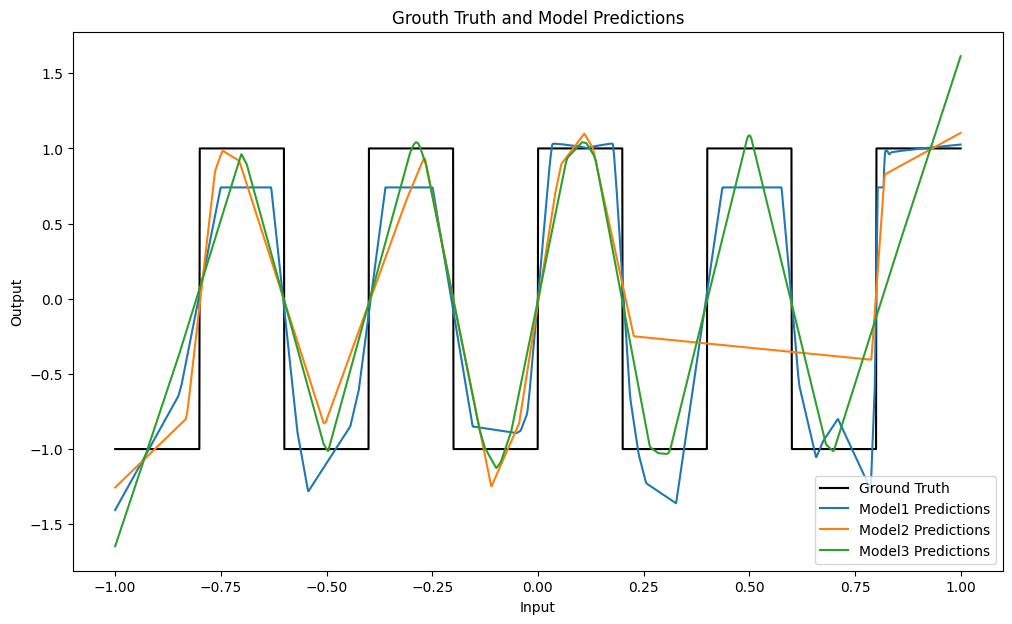

In [26]:
#Ground Truth and Predictions
pt.figure(figsize=(12,7))
pt.plot(x_actual, y_actual, color='black', label = 'Ground Truth')

labels = ['Model1 Predictions', 'Model2 Predictions', 'Model3 Predictions']
for model, label in zip([nonLinear_model_1, nonLinear_model_2, nonLinear_model_3], labels):
    model.eval()
    with torch.no_grad():
        pt.plot(x_actual, model(x_actual).numpy(), label=label)
pt.title('Grouth Truth and Model Predictions')
pt.xlabel('Input')
pt.ylabel('Output')
pt.legend(loc='lower right')
pt.show()